In [18]:
path = "G:\\Fluid Mechanics\\28.11.2022\\"
file_in = open(path + "test2.txt", "r")
file_out = open(path + "output.csv", "w")

from math import sqrt, pow

# Get length of vector
def calc_length(u: float, v: float, w: float) -> float:
    return sqrt(pow(u, 2) + pow(v, 2) + pow(w, 2))

def parse_input():
    # Skip first line
    file_in.readline()
    file_out.write("x,y,vel\n")

    for line in file_in.readlines():
        # x, y, z, vf, u, v, w
        words = line.split()

        uvw =  float(words[4]) + float(words[5]) + float(words[6])
        u = float(words[4])
        v = float(words[5])
        w = float(words[6])
        vf = float(words[3])
        # Skip if we are not at surface
        
        #  or (vf == 1.0 and uvw != 0.0)
        if(0.0 < vf < 1.0):
            length = calc_length(u,v,w)
            file_out.write(f"{float(words[0])},{float(words[1])},{length}\n")

        # Write x, y, velocity magnitude
    file_in.close()
    file_out.close()
parse_input()


In [19]:
import pandas as pd

df = pd.read_csv(path + "output.csv")
#df.head()

print(df.size)

52299


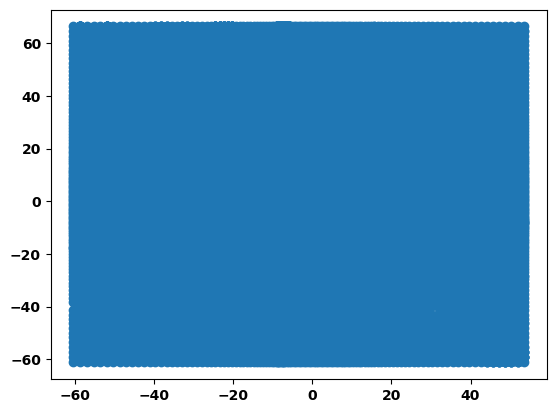

In [20]:
import matplotlib.pyplot as plt

# plt.scatter(x=df["x"], y=df["y"], vmin=df["vel"].min(), vmax=df["vel"].max()) #x=df["x"], y=df["y"]
plt.scatter(x=df["x"], y=df["y"])

In [93]:
df2 = df
df2.sort_values(by=['x'], ascending=False)

,x,y,vel
707615,53.556301,66.366714,2.411337
81087,53.556301,-26.959366,0.000000
409359,53.556301,-19.947515,9.290107
244607,53.556301,14.768085,0.000000
648255,53.556301,-0.310000,1.139291
...,...,...,...
467936,-60.432556,20.175385,3.335095
468048,-60.432556,21.166080,3.396457
468160,-60.432556,22.182339,3.459803
468272,-60.432556,23.224165,3.524955


In [40]:
# print(df["55.55"]["20.17"])

<AxesSubplot: xlabel='x', ylabel='y'>

c:\Users\Kristoffer\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\Kristoffer\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


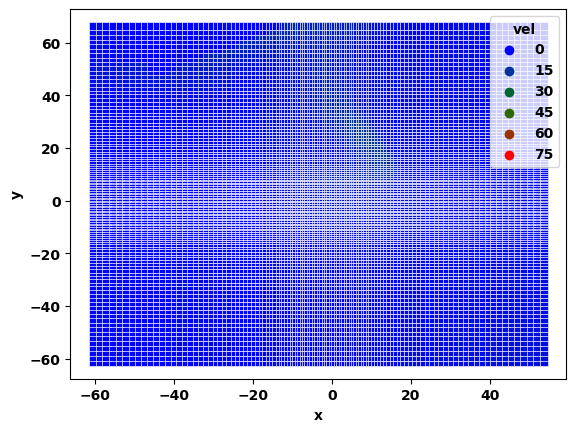

In [94]:
import seaborn as sns

sns.scatterplot(data=df, x=df["x"], y=df["y"], hue=df["vel"], palette=sns.color_palette("blend:b,g,r", as_cmap=True), marker="s")

In [7]:
df.head()

,x,y,vel
0,45.564125,-61.222099,1.567233
1,47.108948,-61.222099,1.817654
2,48.680576,-61.222099,1.811174
3,50.279011,-61.222099,1.821229
4,51.904251,-61.222099,1.754743


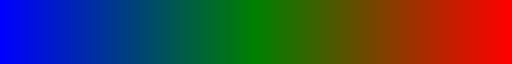

In [8]:
sns.color_palette(['c', 'g', 'r'], as_cmap=True)
sns.color_palette("blend:b,g,r", as_cmap=True)


KeyboardInterrupt: 

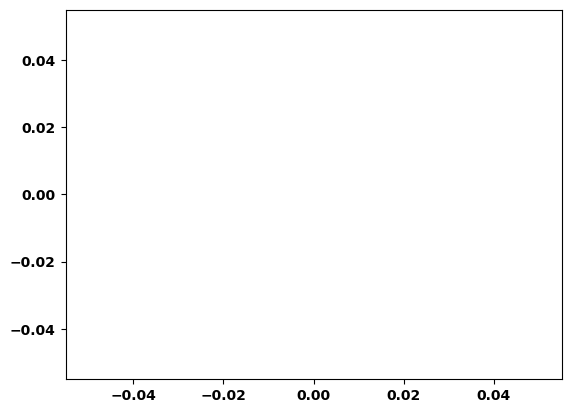

In [9]:
sns.kdeplot(data=df, x=df["x"], y=df["y"], fill=True)

In [ ]:
from math import dist

x_unique = df['x'].unique().tolist()
x_unique.sort()
# print(x_unique)

max = 0
min = 2
for i in range(len(x_unique)):
    if not(i == len(x_unique)-1):
        distance = dist((x_unique[i],), (x_unique[i+1],))
        if(distance > max):
            max = distance
        if(distance < min):
            min = distance
# print(f"{max}")
# print(f"{min}")

# print(f"dist x: {dist()}")

x_max = df["x"].max()
x_min = df["x"].min()

y_max = df["y"].max()
y_min = df["y"].min()

print(f'Max x: {x_max}')
print(f'Min x: {x_min}')
print(f'Max y: {y_max}')
print(f'Min y: {y_min}')

x_diff = dist((x_min,), (x_max,))
y_diff = dist((y_min,), (y_max,))
print(f"x diff: {x_diff}")
print(f"y diff: {y_diff}")

print(f"x dim: {x_diff / 0.62}")
print(f"y dim: {y_diff / 0.62}")

Max x: 53.556301
Min x: -60.432556
Max y: 66.366714
Min y: -61.222099
x diff: 113.988857
y diff: 127.588813
x dim: 183.85299516129032
y dim: 205.78840806451615
